# 2. Visualization with hierarchical clustering and t-SNE

## Hierarchical clustering

Visualizations communicate insight

t-SNE can be used to create a 2D map of a dataset (see later)

We can use hierarchical clustering to cluster samples into groups (where clusters are contained in one another

(Agglomerative) hierarchical clustering:
- Every data point belongs in a separate cluster
- At each step, the two closest clusters are merged
- Continue until all data points are in a single cluster

In [181]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [182]:
samples = pd.read_csv('./datasets/seeds.csv', index_col=0)

In [183]:
samples.shape

(42, 7)

In [184]:
samples.head()

,0,1,2,3,4,5,6
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219


In [185]:
varieties = pd.read_csv('./datasets/varieties.csv', index_col=0).values.flatten()

In [186]:
varieties

array(['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',
       'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat'], dtype=object)

To perform hierarchical clustering, we can use the `linkage` function and `dendrogram` to visualise the arrangement of clusters produced by the clustering.

In [187]:
mergings = linkage(samples, method='complete')

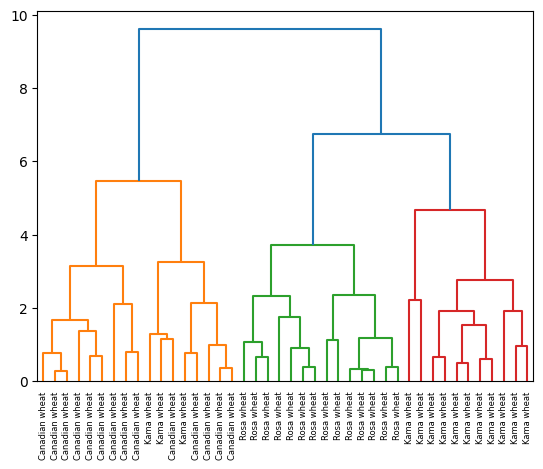

In [188]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

The dendrogram of a hierarchical clustering is read from the bottom up, where the vertical lines represent clusters.

The height on a dendrogram: maximum distance between merging clusters (don't merge clusters further apart than this).

If the hierarchical clustering were stopped at height 6 on the dendrogram, we would have 3 separate clusters.

Next, we will use hierarchical clustering to cluster companies based on stock price movements.

Here, the rows correspond to companies, and the columns correspond to stock price movements.

In [189]:
movements = pd.read_csv('./datasets/movements.csv')

In [190]:
companies = movements.iloc[:, 0].values

In [191]:
companies

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype=object)

In [192]:
movements = movements.iloc[:, 1:].values

In [193]:
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

In [194]:
from sklearn.preprocessing import normalize

In [195]:
# Rescale the price movements for each stock
normalized_movements = normalize(movements)

In [196]:
movements_mergings = linkage(normalized_movements, method='complete')

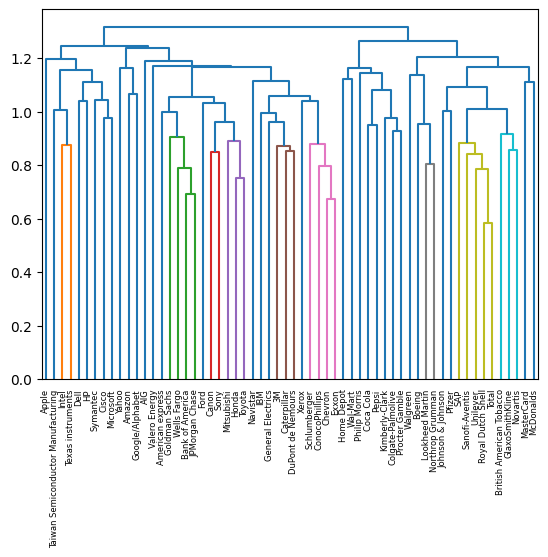

In [197]:
dendrogram(movements_mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

## Cluster labels and linkage methods

The distance between clusters is defined by a linkage method.

Complete linkage: distance between clusters is distance between the **furthest** points of the clusters

Single linkage: distance between clusters is distance between **closest** points of the clusters

Once the distance is calculated for the chosen linkage method, the closest clusters are those which have the smallest distance between the relevant points

Different linkage, different hierarchical clustering!

Now, we will extract the cluster labels for the intermediate clustering (i.e. after cutting the dendrogram at a particular height), and compare the labels with the grain varieties using a cross-tabulation.

In [198]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

In [199]:
# fcluster extracts labels
labels = fcluster(mergings, 6, criterion='distance')

In [200]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [201]:
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


Here, wee see nearly all grain varieties coincide with their respective cluster labels (3 groups, 3 clusters).

## t-SNE

t-SNE: t-distributed stochastic neighbor embedding

Maps samples to 2D space (or 3D) (the map approximately preserves nearness of samples)

Good for inspecting datasets

t-SNE features are different every time (but points have same position relative to one another)

But cannot extend the map to include new data samples (must start over each time)

And need to choose learning rate for the dataset (choosing the wrong value would bunch the points together - try values between 50 and 200)

In [220]:
seeds_full = pd.read_csv('./datasets/seeds_full.csv')

In [221]:
variety_numbers = seeds_full.iloc[:, -1].values

In [222]:
variety_numbers

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [223]:
seeds_full = seeds_full.iloc[:, :-1].values

In [224]:
seeds_full

array([[14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955, ...,  3.379 ,  2.259 ,  4.805 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [225]:
from sklearn.manifold import TSNE

In [226]:
model = TSNE(learning_rate=200)

In [227]:
tsne_features = model.fit_transform(seeds_full)

/Users/harrybaines/Documents/Coding/DataCamp-ML-Scientist-Track/datacampenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [228]:
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

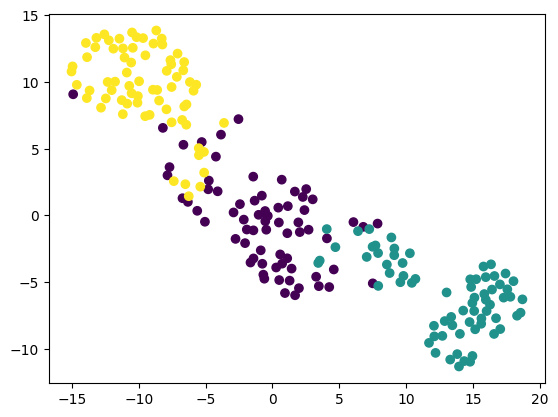

In [229]:
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

The t-SNE visualisation manages to separate the 3 varieties of grain samples.

t-SNE provides great visualisations when the individual samples can be labelled.

Next, we will use t-SNE on the company stock price data (a scatter plot of the t-SNE features, labelled by the company names, gives a map of the stock market).

In [242]:
model = TSNE(learning_rate=50)

In [243]:
tsne_features = model.fit_transform(normalized_movements)

/Users/harrybaines/Documents/Coding/DataCamp-ML-Scientist-Track/datacampenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [244]:
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

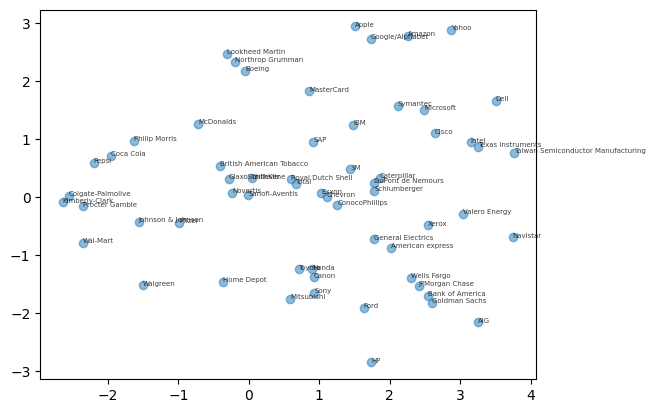

In [245]:
plt.scatter(xs, ys, alpha=0.5)
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

t-SNE is a powerful tool to extract quick insights from high dimensional data.